In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [6]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output



TEST SIZE 80: 20

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [11]:
# Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)



Epoch 1/50

3/3 - 5s - loss: 0.2863 - val_loss: 0.0265 - 5s/epoch - 2s/step
Epoch 2/50
3/3 - 0s - loss: 0.2739 - val_loss: 0.0253 - 77ms/epoch - 26ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2614 - val_loss: 0.0249 - 64ms/epoch - 21ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2495 - val_loss: 0.0251 - 70ms/epoch - 23ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2380 - val_loss: 0.0261 - 68ms/epoch - 23ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2262 - val_loss: 0.0278 - 70ms/epoch - 23ms/step
Epoch 7/50
3/3 - 0s - loss: 0.2154 - val_loss: 0.0303 - 119ms/epoch - 40ms/step
Epoch 8/50
3/3 - 0s - loss: 0.2047 - val_loss: 0.0336 - 75ms/epoch - 25ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1943 - val_loss: 0.0377 - 61ms/epoch - 20ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1840 - val_loss: 0.0426 - 61ms/epoch - 20ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1739 - val_loss: 0.0485 - 59ms/epoch - 20ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1648 - val_loss: 0.0553 - 55ms/epoch - 18ms/step
Epoch 13/50
3/3 - 0s - loss: 0.1554 - val_loss: 0

In [12]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 1s 994ms/step
Mean Squared Error (MSE): 10791512.210418142
Mean Absolute Error (MAE): 3154.0483598347196
Mean Absolute Percentage Error (MAPE): 30.37%


In [13]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 53ms/step


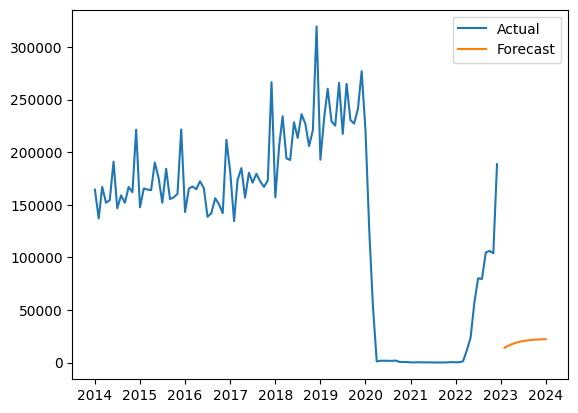

In [14]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.legend()
plt.show()

TEST SIZE 80:20

In [1]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'create_sequences' is not defined

In [95]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [96]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/100
3/3 [==============================] - 3s 347ms/step - loss: 0.2736 - val_loss: 0.1785
Epoch 2/100
3/3 [==============================] - 0s 92ms/step - loss: 0.2488 - val_loss: 0.1637
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2263 - val_loss: 0.1514
Epoch 4/100
3/3 [==============================] - 0s 44ms/step - loss: 0.2083 - val_loss: 0.1416
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 0.1926 - val_loss: 0.1341
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 0.1775 - val_loss: 0.1286
Epoch 7/100
3/3 [==============================] - 0s 46ms/step - loss: 0.1658 - val_loss: 0.1243
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1567 - val_loss: 0.1215
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1467 - val_loss: 0.1210
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1398 - val_loss: 0.1228
Epoch 11/100
3/3 [

In [50]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.011842804029583931


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 54ms/step
r2: 0.8369448535565991


In [56]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

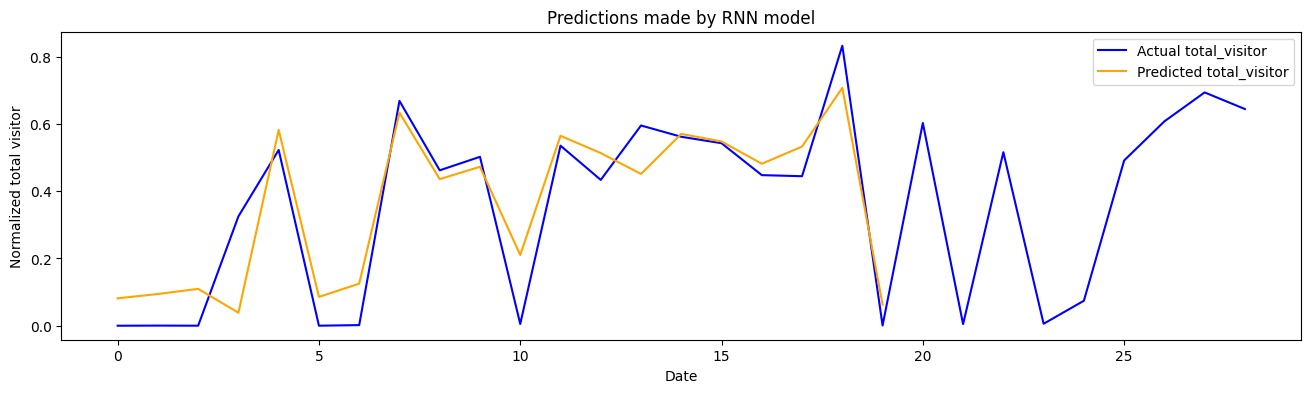

In [64]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")

TEST SIZE 70:30

In [69]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [70]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [71]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
3/3 [==============================] - 3s 255ms/step - loss: 0.2547 - val_loss: 0.1772
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2290 - val_loss: 0.1621
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2059 - val_loss: 0.1484
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1843 - val_loss: 0.1380
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 0.1673 - val_loss: 0.1319
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1513 - val_loss: 0.1301
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1424 - val_loss: 0.1316
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1384 - val_loss: 0.1359
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1369 - val_loss: 0.1404
Epoch 10/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1369 - val_loss: 0.1416
Epoch 11/100
3/3 [

In [72]:
# Evaluate the model
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')



Mean Squared Error on Test Data: 0.019717952236533165


In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 319ms/step
r2: 0.733337841285949


In [75]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

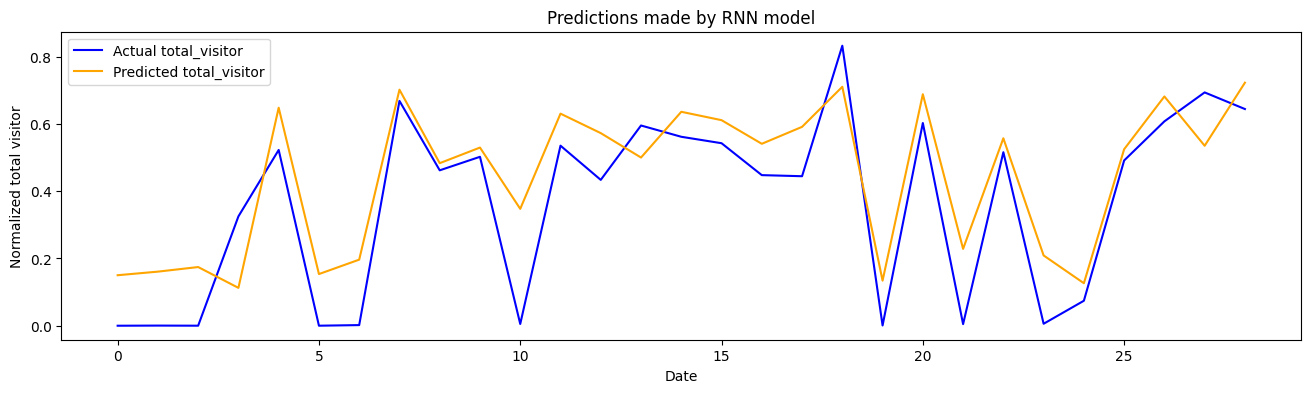

In [76]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")

TEST SIZE 60:40

In [101]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [102]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [103]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
2/2 [==============================] - 3s 778ms/step - loss: 0.2656 - val_loss: 0.2606
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 0.2451 - val_loss: 0.2435
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.2260 - val_loss: 0.2282
Epoch 4/100
2/2 [==============================] - 0s 50ms/step - loss: 0.2097 - val_loss: 0.2150
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 0.1952 - val_loss: 0.2036
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 0.1819 - val_loss: 0.1941
Epoch 7/100
2/2 [==============================] - 0s 75ms/step - loss: 0.1722 - val_loss: 0.1859
Epoch 8/100
2/2 [==============================] - 0s 97ms/step - loss: 0.1628 - val_loss: 0.1783
Epoch 9/100
2/2 [==============================] - 0s 66ms/step - loss: 0.1552 - val_loss: 0.1713
Epoch 10/100
2/2 [==============================] - 0s 86ms/step - loss: 0.1480 - val_loss: 0.1651
Epoch 11/100
2/2 [

In [104]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.018665943294763565


In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

2/2 [==============================] - 0s 0s/step
r2: 0.7908992167994537


In [107]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

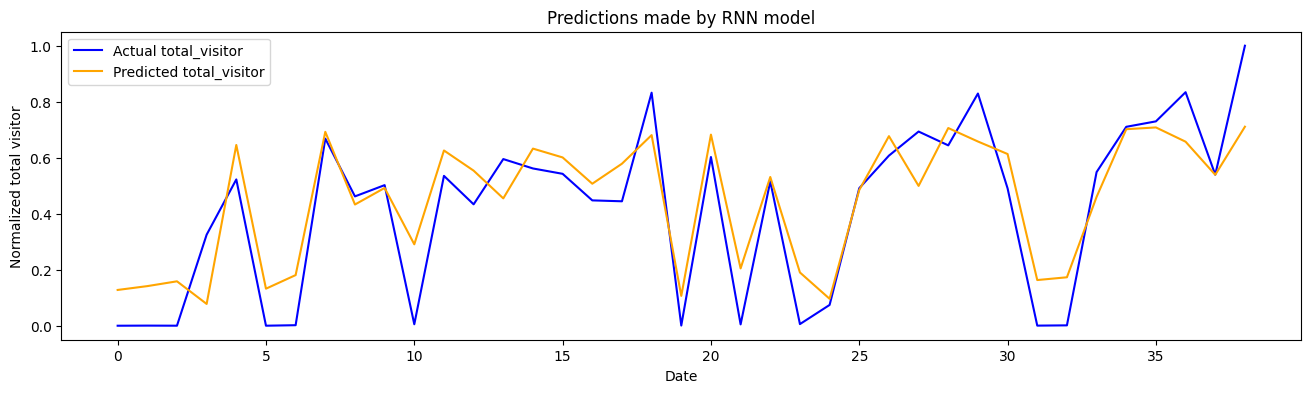

In [108]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")